## Investigating the QR Iteration

In [10]:
import numpy as np
from scipy.linalg import qr, hessenberg
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

We start with some randome matrix A

In [13]:
rand = np.random.RandomState(0)
n = 10
A  = rand.rand(n, n) + 1j * rand.rand(n, n)

Let us first transform the matrix to upper Hessenberg form. This does not change the eigenvalues.

In [14]:
H = hessenberg(A)

Let's plot the result.

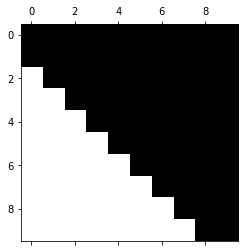

In [15]:
plt.spy(H)

It might look triangular. But the first lower diagonal is also nonzero.

The Hessenberg form is invariant under one step of QR iteration. Let's check this.

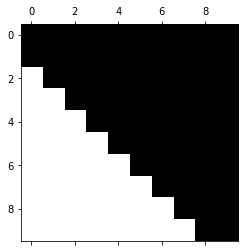

In [16]:
Q, R = qr(H)
H2 = R @ Q
plt.spy(H2)

In practice, one does not call just a dense QR decomposition. But one works directly on the structure. This leads to an interesting little algorithm called bulge chasing, which we do not discuss further here, but is very important for practical implementations.

Let us now run a couple of iterations of the QR iteration and let's see how quickly the second to last element in the last row of $H$ converges to zero. It is zero the bottom last diagonal element is a wanted eigenvalue.

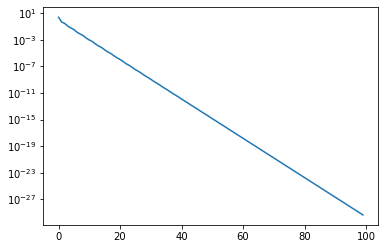

In [17]:
nsteps = 100

H = hessenberg(A)

residuals = np.empty(nsteps, dtype='float64')

for index in range(nsteps):
    Q, R = qr(H)
    H = R @ Q
    residuals[index] = np.abs(H[-1, -2]) / np.abs(H[-1, -1])
    
plt.semilogy(residuals)

The convergence is a bit slow. In 40 steps the second to last element is only of size around $10^{-11}$.

Let us speed this up now by introducing a shift strategy.

Residual: 0.15859990555710826
Residual: 0.00480568733011793
Residual: 5.411433421874815e-06
Residual: 8.144398220322452e-12
Residual: 1.558604737271024e-23


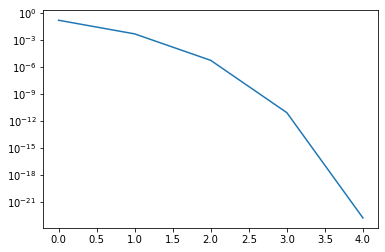

In [18]:
nsteps = 5

H = hessenberg(A)

residuals = np.empty(nsteps, dtype='float64')

ident = np.eye(n)

for index in range(nsteps):
    shift = H[-1, -1]
    Q, R = qr(H - shift * ident)
    H = np.dot(R, Q) + shift * ident
    residual = np.abs(H[-1, -2]) / np.abs(H[-1, -1])
    print(f"Residual: {residual}")
    residuals[index] = residual
    
plt.semilogy(residuals)

We have converged in 4 iterations. Let us now reduce the matrix and continue with the next smaller matrix.

Residual: 0.4014179183647712
Residual: 0.027851788347264733
Residual: 0.0001353015860237914
Residual: 4.892875899909358e-09
Residual: 2.2001619599736492e-18


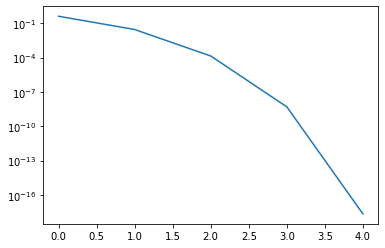

In [19]:
nsteps = 5

H_reduced = H[:-1, :-1] # Copy H over to preserve the original matrix

residuals = np.empty(nsteps, dtype='float64')

ident = np.eye(n-1, n-1)

for index in range(nsteps):
    shift = H_reduced[-1, -1]
    Q, R = qr(H_reduced - shift * ident)
    H_reduced = R @ Q + shift * ident
    residual = abs(H_reduced[-1, -2]) / abs(H_reduced[-1, -1])
    print(f"Residual: {residual}")
    residuals[index] = residual
    
plt.semilogy(residuals)

Again, we have converged in 5 iterations. In practice, with more sophisticated shift variants and better deflation strategies the QR iteration takes typically only 2 to 3 iterations per eigenvalue, where each iteration has quadratic cost. Hence, the overall algorithm converges usually in cubic time. Therefore, even though the QR iteration is an iterative algorithm we therefore speak of a method with cubic complexitiy since this holds in almost all cases.